This is the Python jupyter notebook for the Earnings and Height analysis.

We will follow the exercise steps given below:

# PDF Page 1

![PDF Page 1]("../Used data and given exercise/Page 1.png")

# PDF Page 2

![PDF Page 2]("../Used data and given exercise/Page 2.png")

## Step 1 - importing the necessary data analysis libraries

We will start by importing the necessary libraries for our analysis. We will be using pandas, numpy, and odfpy libraries. We will import more libraries as we go along.

All used libraries can be found in the requirements.txt file.

In [101]:

import os
import pandas as pd
import numpy as np


## Step 2 - Reading the Excel file

We will read the excel file using the pandas library. We will be reading the file named "Earnings and Height.xlsx" from our "Used data and given exercise" folder, which contains the data of earnings and height of US workers. <br> <br>
 The xlsx file given in [The Stock and Watson Website]("https://media.pearsoncmg.com/ph/bp/bp_stock_econometrics_4_cw/content/datapages/stock04_data04.html") appears to be corrupted. Pandas and openpyxl libraries cannot read it. We will use the conveted odf file instead. We will use the odffile odfpy library to read the file.

We will save this is a pandas dataframe named "df".

In [102]:
df = pd.read_excel("../Used data and given exercise/Earnings_and_Height.ods")

## Step 3 - Exploring the data

Let's first take a look at the data. We will use the head() function to see the first few rows of the data.

In [103]:
df.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.750000,65,133,1
1,0,41,6,12,1,2,1,14021.394531,65,155,1
2,0,26,1,16,1,1,1,84054.750000,60,108,1
3,0,37,1,16,1,2,1,84054.750000,67,150,1
4,0,35,6,16,1,1,1,28560.386719,68,180,1


As we can see, the data set is large and neatly organized. We have columns for the characteristics of the workers, such as their age, gender, education level, and income. We also have the height of the workers in inches.

### Step 4 - Scatter plot of Earnings and height

We will focus on the relationship between income and height. We will plot a scatter plot to see the relationship between earnings and height.

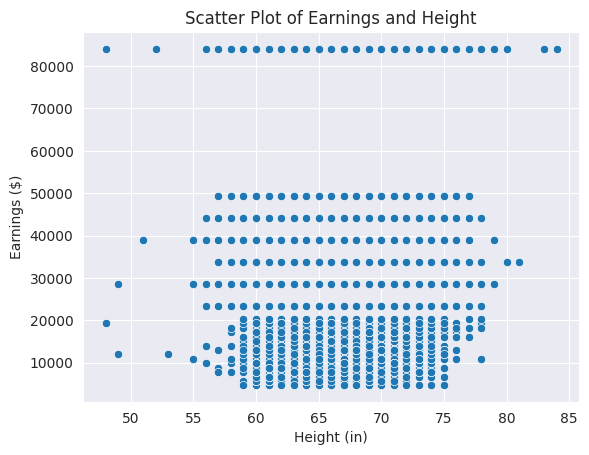

Total height range: 36


In [104]:
# Scatter plot of Earnings and Height:

#Importing plotting libraries:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's make it a function so we can reuse it later.
def scatter_plot(df):
    sns.scatterplot(x="height", y="earnings", data=df)

    X = df["height"]
    y = df["earnings"]

    # Adding labels and title:
    plt.xlabel("Height (in)")
    plt.ylabel("Earnings ($)")
    plt.title("Scatter Plot of Earnings and Height")
    plt.show()

    return

scatter_plot(df)

max_height = df["height"].max()
min_height = df["height"].min()
total_height_range = max_height - min_height
print("Total height range:", total_height_range)

On the scatter plot we see that like the task tells us, there are 23 distinct values of Earnings. This is due to the fact that there are only 36 distinct values of Height in the data set. The Earnings values are the averages of a tax bracket, each worker was assigned the average of their tax bracket, like stated in the data information PDF. <br>

From the scatter plot, we can see that there seems to be a positive correlation between height and earnings. Let's examine this further.

## Step 5 - Regression of Earnings and Height

We will now use the statsmodels library to perform a regression of earnings on height. We will use the OLS (ordinary least squares) method to perform the regression.

In [105]:
import statsmodels.api as sm

# Defining the independent and dependent variables:
X = df["height"]
y = df["earnings"]

# Adding a constant to the independent variables:
X = sm.add_constant(X)

# Performing the regression:
model = sm.OLS(y, X).fit()

# Printing the summary of the regression:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.13e-44
Time:                        13:11:32   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -512.7336   3386.856     -0.151      0.8

From the summary we can see that the t-value is 14.016 and the p-value is 0.000, which is less than the significance level of alpha = 0.05 (5% significance level). This means that the regression is significant. The R-squared is small at 0.011, which means that the model explains only 1.1% of the variance in the data. <br>

We can also see that the estimated slope parameter BetaHat1 is equal to 707.671 . Our model estimates that this is the average effect of 1 extra inch of Height on Earnings.

# Step 6 - Ommited variable bias explanation

The task states that Case and Paxton (2008) suggested that Height correlates with an ommited factor which is intelligence, due to taller people having a more healthy upbringing and hence higher intelligence and height.

Since inteligence is hard to measure and not included it our data set, we cannot measure its effect.

The real impact of Height would of be lower than we estimated since in such case Height and Intelligence are positively correlated and both have a positive effect on Earnings. Our estimator would include the effect of Intelligence, and thus be higher than the real impact of Height.

# Step 7 - Education as a substite for Intelligence

We are asked to construct a regression model that includes Education as a substitute for Intelligence.
We will create 4 new variables:
- LT_HS = 1, if the worker has less than high school education (educ < 12).
- HS = 1, if the worker has high school education (educ = 12).
- Some_Col, if the worker has some college education (12 < educ < 16).
- College = 1, if the worker has bachelor's degree education (educ >= 16).



In [106]:
# Creating the new variables and adding them to the data frame:

df["LT_HS"] = np.where(df["educ"] < 12, 1, 0)
df["HS"] = np.where(df["educ"] == 12, 1, 0)
df["Some_Col"] = np.where((df["educ"] > 12) & (df["educ"] < 16), 1, 0)
df["College"] = np.where(df["educ"] >= 16, 1, 0)

#list df columns to see the new variables:
print(df.columns)
print(df.head())

Index(['sex', 'age', 'mrd', 'educ', 'cworker', 'region', 'race', 'earnings',
       'height', 'weight', 'occupation', 'LT_HS', 'HS', 'Some_Col', 'College'],
      dtype='object')
   sex  age  mrd  educ  cworker  region  race      earnings  height  weight  \
0    0   48    1    13        1       3     1  84054.750000      65     133   
1    0   41    6    12        1       2     1  14021.394531      65     155   
2    0   26    1    16        1       1     1  84054.750000      60     108   
3    0   37    1    16        1       2     1  84054.750000      67     150   
4    0   35    6    16        1       1     1  28560.386719      68     180   

   occupation  LT_HS  HS  Some_Col  College  
0           1      0   0         1        0  
1           1      0   1         0        0  
2           1      0   0         0        1  
3           1      0   0         0        1  
4           1      0   0         0        1  


# Step 8 - Control regression of Earnings and Height for women

We will now perform the regression of earnings on height for women only. We will use the same regression method as before, but this time we will only include women in our data set.

In [107]:
# Defining the independent and dependent variables for women (women when column "sex" is 0):
X = df[df["sex"] == 0]["height"]
y = df[df["sex"] == 0]["earnings"]

# Adding a constant to the independent variables:
X = sm.add_constant(X)

# Performing the regression:
model = sm.OLS(y, X).fit()

# Printing the summary of the regression:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.72
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.40e-07
Time:                        13:11:32   Log-Likelihood:            -1.1585e+05
No. Observations:                9974   AIC:                         2.317e+05
Df Residuals:                    9972   BIC:                         2.317e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.265e+04   6383.741      1.982      0.0

# Step 9 - Regression of Earnings and Height including LT_HS, HS, Some_Col, and College for women

We will now perform the regression of earnings on height including the new variables for women. We will use the same regression method as before, but this time we will only include women in our data set.

In [108]:
# Defining the independent and dependent variables for women (women when column "sex" is 0):
X = df[df["sex"] == 0][["height", "LT_HS", "HS", "Some_Col", "College"]]
y = df[df["sex"] == 0]["earnings"]

# Adding a constant to the independent variables:
X = sm.add_constant(X)

# Performing the regression:
model = sm.OLS(y, X).fit()

# Printing the summary of the regression:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     399.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          8.07e-320
Time:                        13:11:32   Log-Likelihood:            -1.1512e+05
No. Observations:                9974   AIC:                         2.302e+05
Df Residuals:                    9969   BIC:                         2.303e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.761e+04   4771.455      5.787      0.0

# Step 10 - Why the regression ommits college education?

The Stastsmodels library does not have a built-in method to avoid multicollinearity. We will have to check for multicollinearity manually.



In [109]:
# Multicollinearity check:

# Calculating the VIF (Variance Inflation Factor) for each variable:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

print(vif) # Values close to 1 indicate that there is no multicollinearity.

    VIF Factor    features
0     2.163771         sex
1     1.074169         age
2     1.212356         mrd
3     7.778433        educ
4     1.046002     cworker
5     1.038676      region
6     1.129380        race
7     1.471941    earnings
8     2.287575      height
9     1.182989      weight
10    1.527121  occupation
11   70.791316       LT_HS
12  276.607426          HS
13  201.623864    Some_Col
14  259.342044     College


As we can see the, chosen variables do have a very high VIF factor, which indicates that there is multicollinearity. <br>
This means that the regression may not be accurate. We will need to remove one of the variables to get a better model. <br>

Since Statsmodels does not have a built-in method to avoid multicollinearity, we will have to remove one of the new variables ourselves.

In [110]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the independent and dependent variables for women (women when column "sex" is 0)
X = df[df["sex"] == 0][["height", "LT_HS", "HS", "Some_Col"]]  # Removing "College" variable to make it the comparison point.
y = df[df["sex"] == 0]["earnings"]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Performing the regression
model = sm.OLS(y, X).fit()

# Printing the summary of the regression
print(model.summary())

# Multicollinearity check:
# Calculating the VIF (Variance Inflation Factor) for each variable
df_nomen = df[df['sex'] != 0]
df_filtered = df_nomen.drop(columns=["College"])  # Removing "College" variable to make it the comparison point.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_filtered.values, i) for i in range(df_filtered.shape[1])]
vif["features"] = df_filtered.columns

print(vif)
# Values close to 1 indicate that there is no multicollinearity.


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     399.6
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          8.07e-320
Time:                        13:11:32   Log-Likelihood:            -1.1512e+05
No. Observations:                9974   AIC:                         2.302e+05
Df Residuals:                    9969   BIC:                         2.303e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.075e+04   6013.681      8.439      0.0

## Analysing the results for women:
- Multicollinearity has between the new variables has been reduced.
- The impact of height on earnings for women is decreased, is no longer significant at alpha = 0.05, with a t-value of just 1.460.
- R squared has increased from 0.003 to 0.138, which means that the model now explains 13.8% of the variance in the data.
- The new parameters are all significant at alpha = 0.05, with t-values of over 10.


- We can see the pattern that more education leads to higher earnings on average. <br>
As women get more educated, they tend to earn more with college educated women earning the most.

# Step 11 - Regression of Earnings and Height for men

In [111]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the independent and dependent variables for men (men when column "sex" is 1)
X = df[df["sex"] == 1][["height", "LT_HS", "HS", "Some_Col"]]  # Removing "College" variable to make it the comparison point.
y = df[df["sex"] == 1]["earnings"]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Performing the regression
model = sm.OLS(y, X).fit()

# Printing the summary of the regression
print(model.summary())

# Multicollinearity check:
# Calculating the VIF (Variance Inflation Factor) for each variable
df_men = df[df['sex'] != 1]
df_filtered = df_men.drop(columns=["College"])  # Removing "College" variable to make it the comparison point.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_filtered.values, i) for i in range(df_filtered.shape[1])]
vif["features"] = df_filtered.columns

print(vif)
# Values close to 1 indicate that there is no multicollinearity.

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     392.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          1.68e-308
Time:                        13:11:32   Log-Likelihood:                -91041.
No. Observations:                7896   AIC:                         1.821e+05
Df Residuals:                    7891   BIC:                         1.821e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9862.7404   6697.041      1.473      0.1

/home/aidmantas/repos/SW-econometrics-exercises/.venv/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


## Analysing the results for men:

- We can see that men earn more than women on average.
- R squared is 0.165, which means that the model now explains 16,5% of the variance in the data. More than the regression for women.<br>
- Contrary to women, the height of men still is statistically significant at alpha = 0.05, with a t-value of 7.864. <br>
The coefficient is almost 7 times higher than that of women, which means that men earn more on average with a 1 inch increase in height.

- The impact of education on earnings for men is almost the same as for women, with some small differences. <br>
All of the parameters are significant at alpha = 0.05, with t-values of over 10. <br>
As education level increases, men earn more on average.

# Step 12 - Conclusion

## Using OLS (Ordinary Least Squares) regression, we have found that:

- We have analysed the relationship between earnings and height for men and women. <br>
- We have found that men earn more on average with a 1 inch increase in height, while women earn less on average with a 1 inch increase in height. <br>
- We have also found that education level is a significant factor in determining earnings for both men and women. <br>